In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet
from datetime import datetime

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

In [6]:
pinkwink_web = pd.read_csv('ch07/08. PinkWink Web Traffic.csv', encoding='utf-8', thousands=',', names=['date', 'hit'], index_col=0)
pinkwink_web = pinkwink_web[pinkwink_web['hit'].notnull()]
pinkwink_web.head()

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0


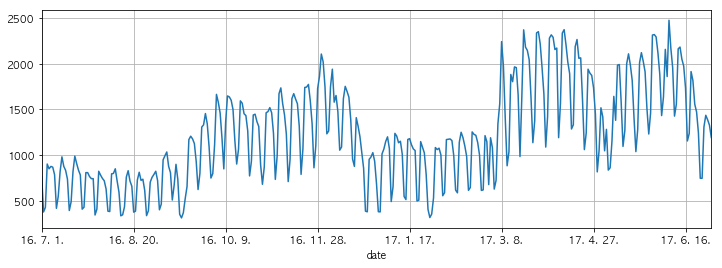

In [7]:
pinkwink_web['hit'].plot(figsize=(12,4), grid=True)

주기성 확인

In [8]:
time = np.arange(0,len(pinkwink_web))
traffic = pinkwink_web['hit'].values
fx = np.linspace(0, time[-1], 1000)

In [9]:
# 모델의 적합성 확인을 위한 error check
def error(f, x,y):
    return np.sqrt(np.mean((f(x)-y)**2))

In [11]:
fp1 = np.polyfit(time, traffic, 1)
f1 = np.poly1d(fp1)

fp2 = np.polyfit(time, traffic, 2)
f2 = np.poly1d(fp2)

fp3 = np.polyfit(time, traffic, 3)
f3 = np.poly1d(fp3)

fp15 = np.polyfit(time, traffic, 15)
f15 = np.poly1d(fp15)

print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.8597308110963
430.62841018946955
429.5328046676293
330.4777307248983


그래프 확인

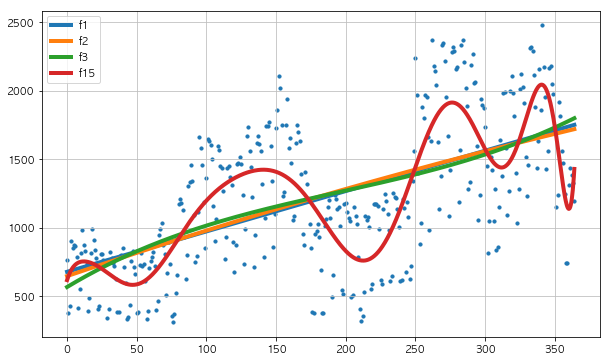

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(time, traffic, s=10)

plt.plot(fx, f1(fx), lw=4, label='f1')
plt.plot(fx, f2(fx), lw=4, label='f2')
plt.plot(fx, f3(fx), lw=4, label='f3')
plt.plot(fx, f15(fx), lw=4, label='f15')

plt.grid(True, linestyle='-', color='0.75')
plt.legend(loc=2)

prophet 모듈을 이용한 forecast 예측

In [13]:
df = pd.DataFrame({'ds':pinkwink_web.index, 'y':pinkwink_web['hit']})
df.reset_index(inplace=True)
df['ds'] = pd.to_datetime(df['ds'], format='%y. %m. %d.')
del df['date']

m = Prophet(yearly_seasonality=True) # 연단위 주기성
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
420,2017-08-25
421,2017-08-26
422,2017-08-27
423,2017-08-28
424,2017-08-29


이후 60일간의 데이터 예측

In [15]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,912.016220,704.546678,1125.376864
421,2017-08-26,496.959103,286.343694,711.479172
422,2017-08-27,629.539848,420.684491,840.473896
423,2017-08-28,1182.228340,972.729310,1390.188790
424,2017-08-29,1218.155649,1008.867424,1429.213604


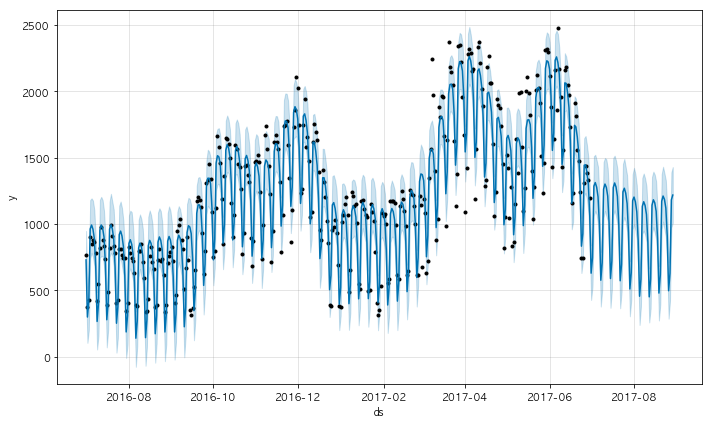

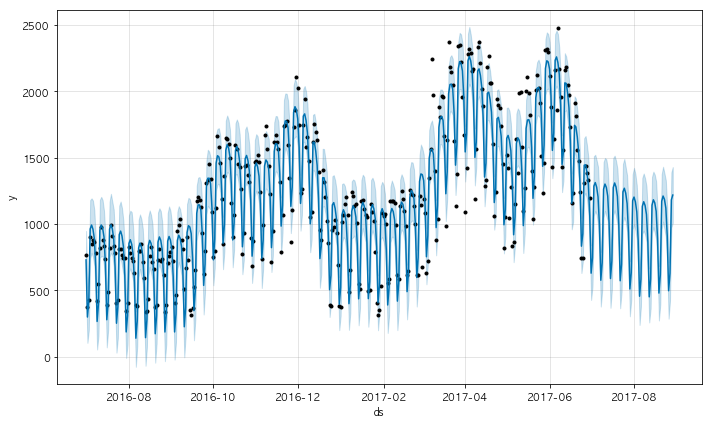

In [16]:
m.plot(forecast)

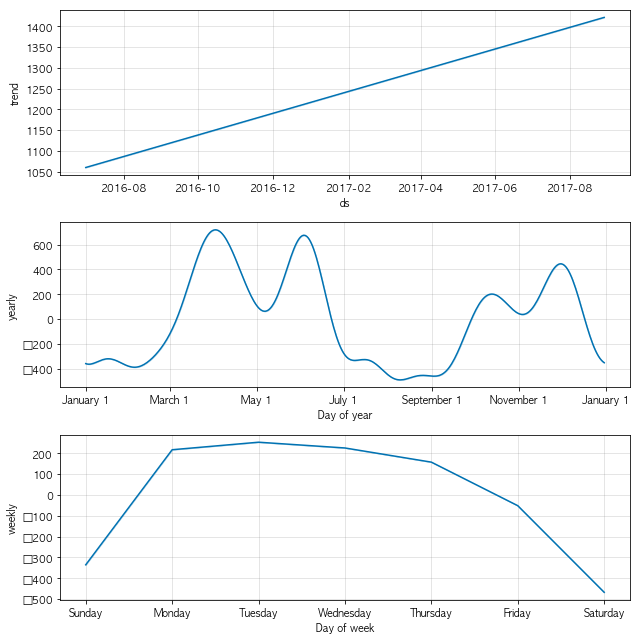

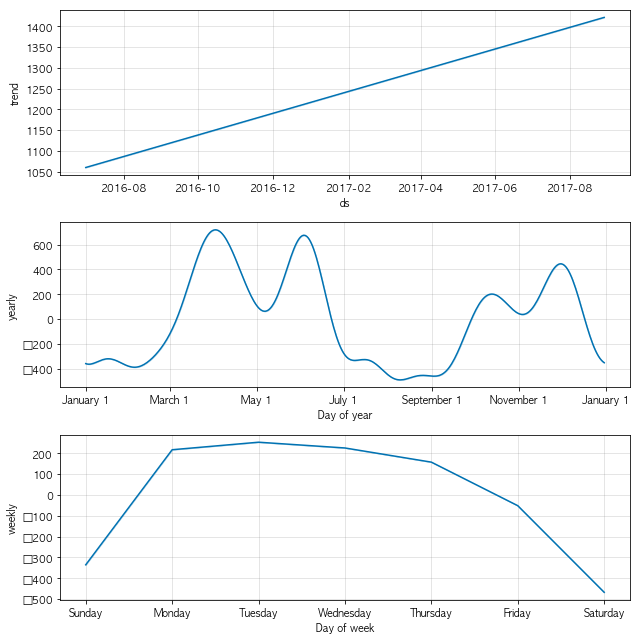

In [17]:
m.plot_components(forecast)

seasonal 시계열 분석으로 주식 데이터 분석 

In [30]:
start = datetime(2003, 1,1)
end = datetime(2017,6,30)

from pandas_datareader import data
import fix_yahoo_finance as yf
yf.pdr_override()

start_date = '2003-01-01' 
end_date = '2017-06-30' 
KIA = data.get_data_yahoo('000270.KS', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [31]:
KIA.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-02,9000.0,9200.0,8950.0,9190.0,7341.233398,688900
2003-01-03,9350.0,9720.0,9330.0,9550.0,7628.813477,1419800
2003-01-06,9720.0,9760.0,9500.0,9700.0,7748.638672,1076300
2003-01-07,9900.0,9920.0,9420.0,9420.0,7524.965332,1034100
2003-01-08,9500.0,9740.0,9400.0,9520.0,7604.849121,599800


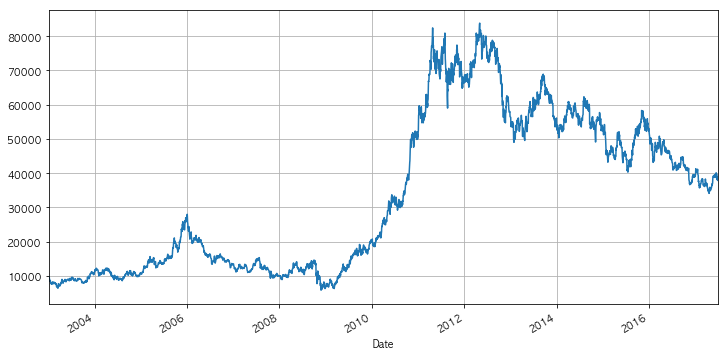

In [32]:
KIA['Close'].plot(figsize=(12,6), grid=True)

In [33]:
KIA_trunc = KIA[:'2016-12-31']
KIA_trunc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-02,9000.0,9200.0,8950.0,9190.0,7341.233398,688900
2003-01-03,9350.0,9720.0,9330.0,9550.0,7628.813477,1419800
2003-01-06,9720.0,9760.0,9500.0,9700.0,7748.638672,1076300
2003-01-07,9900.0,9920.0,9420.0,9420.0,7524.965332,1034100
2003-01-08,9500.0,9740.0,9400.0,9520.0,7604.849121,599800


In [34]:
df = pd.DataFrame({'ds':KIA_trunc.index, 'y':KIA_trunc['Close']})
df.reset_index(inplace=True)
del df['Date']
df.head()

,ds,y
0,2003-01-02,9190.0
1,2003-01-03,9550.0
2,2003-01-06,9700.0
3,2003-01-07,9420.0
4,2003-01-08,9520.0


In [35]:
# 예측(2017년 12월31일까지)
m = Prophet()
m.fit(df)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [36]:
future = m.make_future_dataframe(periods=365) # 1년(365일)
future.tail()

,ds
3833,2017-12-25
3834,2017-12-26
3835,2017-12-27
3836,2017-12-28
3837,2017-12-29


In [37]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3833,2017-12-25,34269.909279,23498.610291,45783.051693
3834,2017-12-26,34307.258106,23928.477816,45580.479042
3835,2017-12-27,34270.395039,23054.216392,45784.181122
3836,2017-12-28,34211.780804,24557.130365,45206.346873
3837,2017-12-29,34117.128946,23566.294985,45952.298165


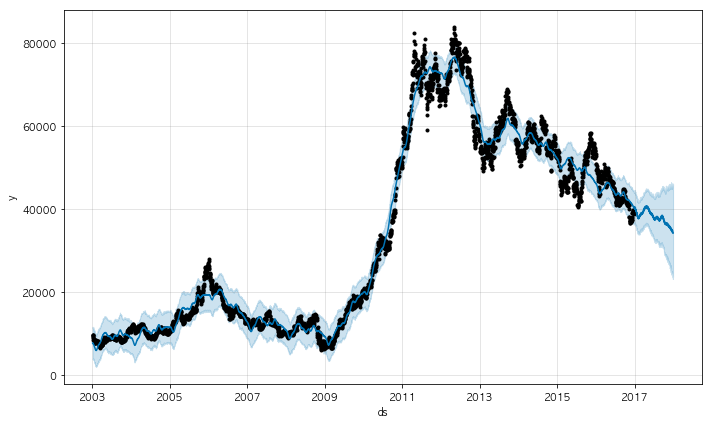

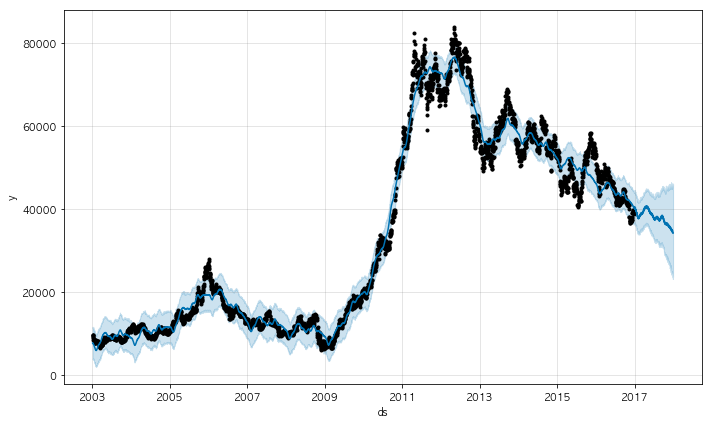

In [38]:
m.plot(forecast)

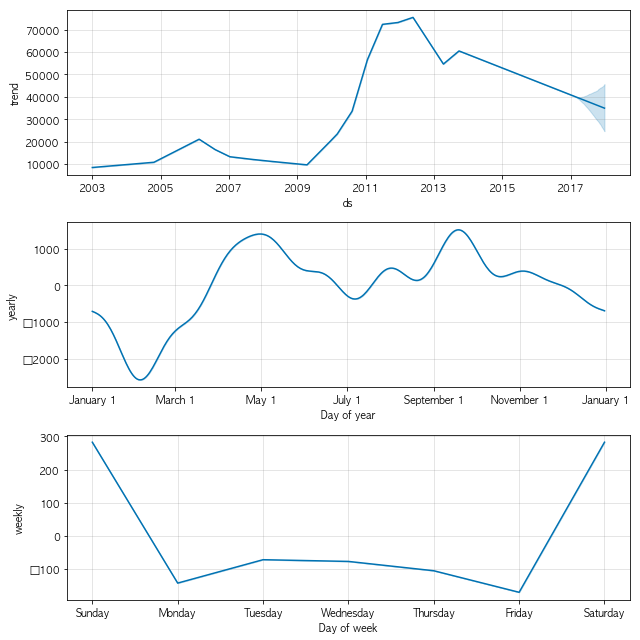

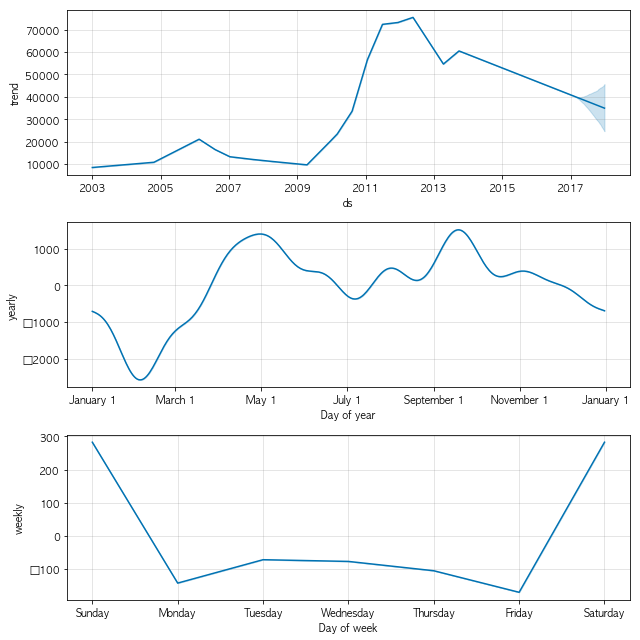

In [39]:
m.plot_components(forecast)

[*********************100%***********************]  1 of 1 downloaded


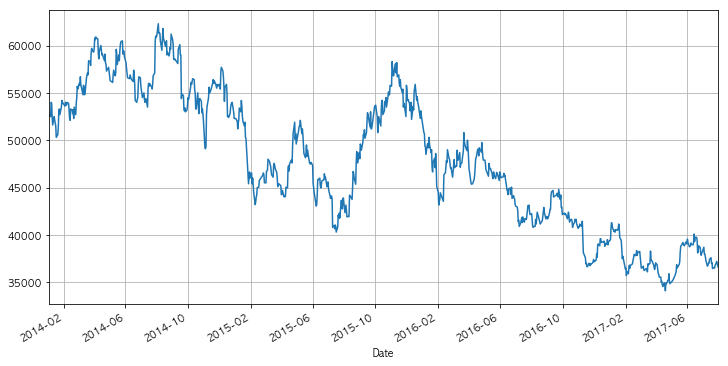

In [40]:
# 예측 성능 확인
start_date = '2014-1-1' 
end_date = '2017-07-31' 
KIA2 = data.get_data_yahoo('000270.KS', start_date, end_date)
KIA2['Close'].plot(figsize=(12,6), grid=True)

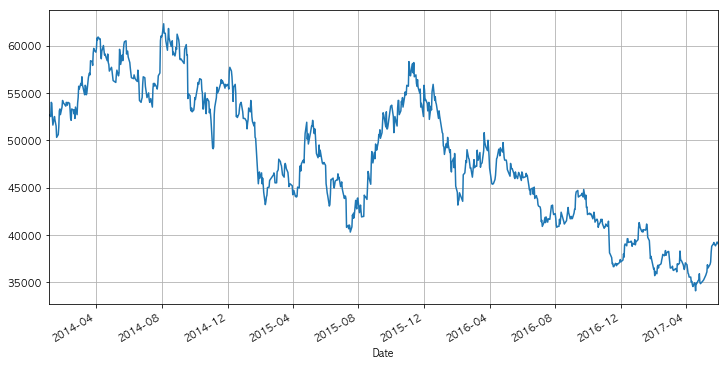

In [42]:
KIA_trunc2 = KIA2[:'2017-05-31']
KIA_trunc2['Close'].plot(figsize=(12,6), grid=True)

In [43]:
df2 = pd.DataFrame({'ds':KIA_trunc2.index, 'y':KIA_trunc2['Close']})
df2.reset_index(inplace=True)
del df2['Date']

61일간 데이터 예측

In [46]:
m2 = Prophet()
m2.fit(df2)
future = m2.make_future_dataframe(periods=61)
future.tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
897,2017-07-27
898,2017-07-28
899,2017-07-29
900,2017-07-30
901,2017-07-31


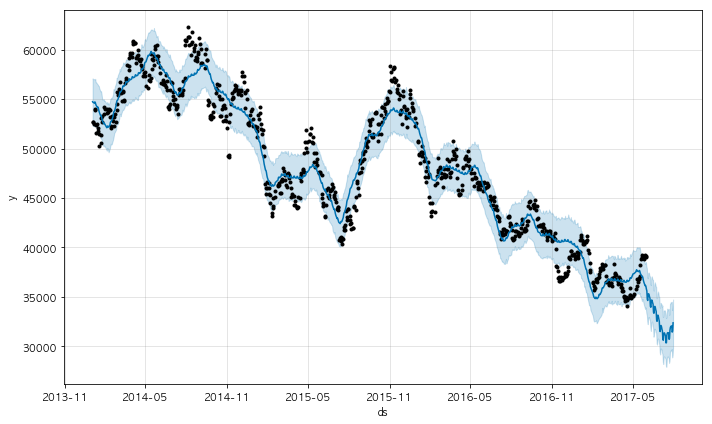

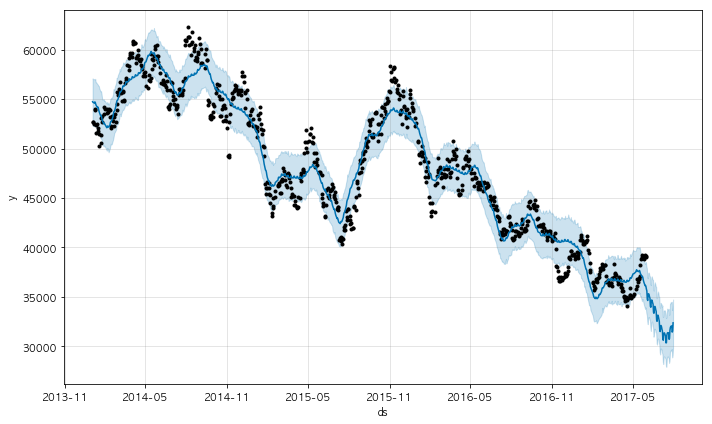

In [48]:
forecast2 = m2.predict(future)
m2.plot(forecast2)

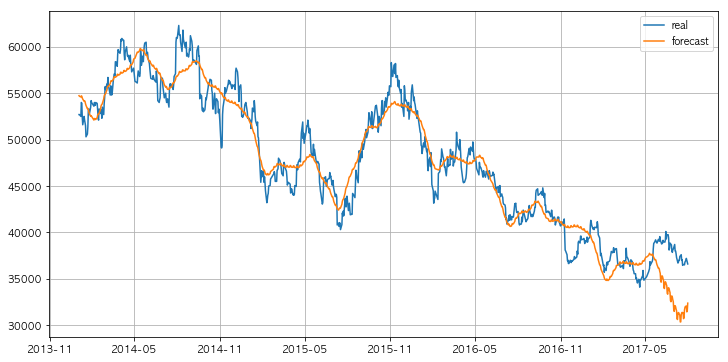

In [49]:
plt.figure(figsize=(12,6))
plt.plot(KIA2.index, KIA2['Close'], label='real')
plt.plot(forecast2['ds'], forecast2['yhat'], label='forecast')
plt.grid()
plt.legend()

Growth Model

In [50]:
df3 = pd.read_csv('ch07/08. example_wp_R.csv')
df3['y'] = np.log(df3['y'])
df3['cap'] = 8.5
m = Prophet(growth='logistic')
m.fit(df3)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


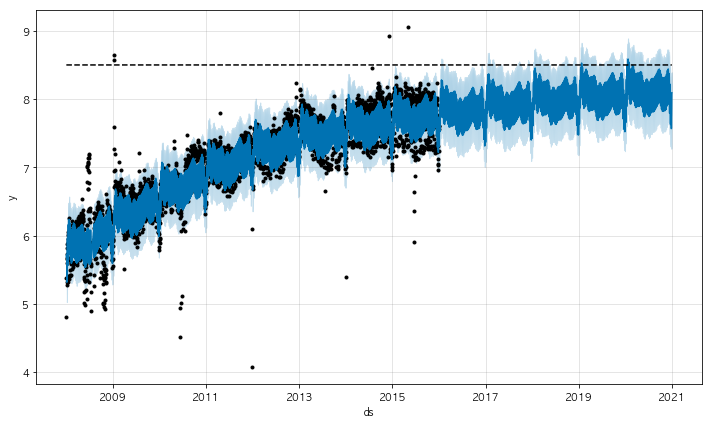

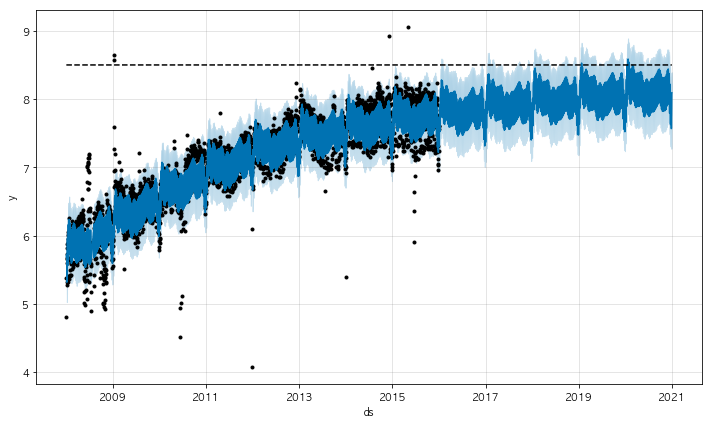

In [51]:
future3 = m.make_future_dataframe(periods=1826)
future3['cap'] = 8.5
fcst = m.predict(future3)
m.plot(fcst)

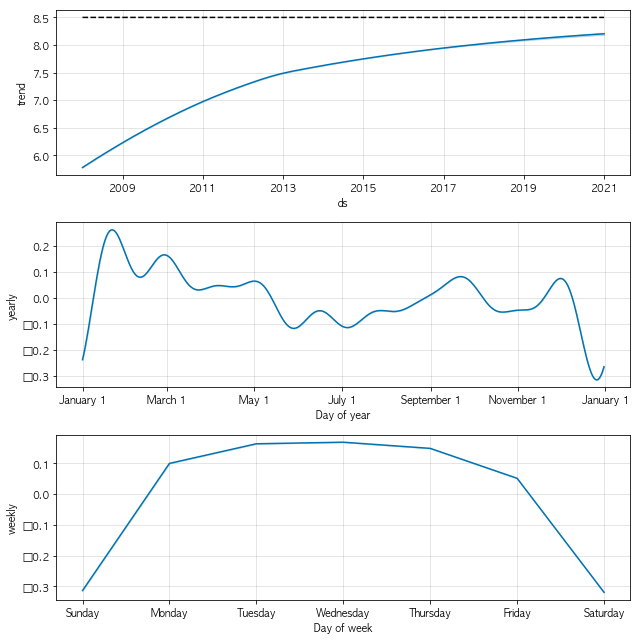

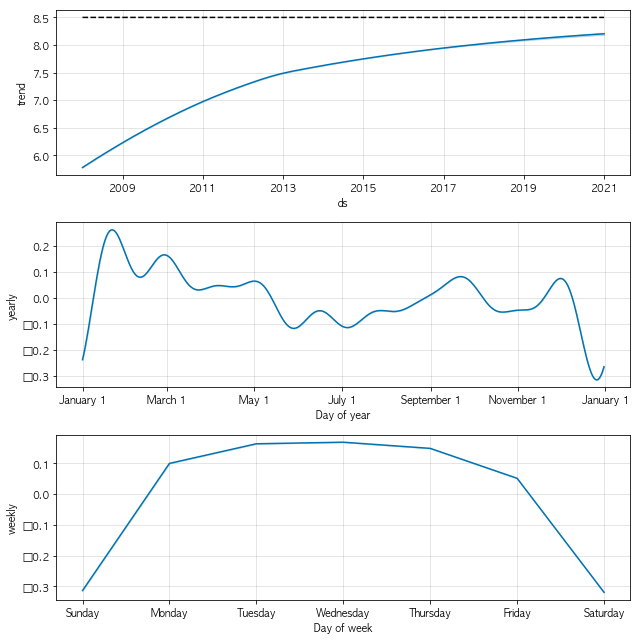

In [52]:
forecast3 = m.predict(future3)
m.plot_components(forecast3)